# Customer Segmentation Using Unsupervised Learning

**In this project, we apply K-Means and Hierarchical Clustering to segment customers based on demographic and spending data.**
**Data is preprocessed, reduced using PCA, and visualized to reveal meaningful customer groups.**

In [ ]:
#Import libraries
import pandas as pd                          
import numpy as np                           
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [2]:
#Load the dataset
df = pd.read_csv("Mall_Customers.csv") 

In [3]:
#Display dataset
print("Original Dataset Preview:")
display(df.head())

Original Dataset Preview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Drop 'CustomerID'
df_processed = df.drop(columns=["CustomerID"])


In [5]:
#Encode 'Gender' column (Male=1, Female=0)
label_encoder = LabelEncoder()
df_processed['Gender'] = label_encoder.fit_transform(df_processed['Gender'])

In [6]:
#missing values
print("\nMissing Values in Each Column:")
print(df_processed.isnull().sum())


Missing Values in Each Column:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
#Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_processed)

In [8]:
#Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df_processed.columns)

In [9]:
#scaled dataset
print("\nProcessed & Scaled Data Preview:")
display(scaled_df.head())


Processed & Scaled Data Preview:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [11]:
#Seaborn
sns.set(style="whitegrid")

In [12]:
#Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

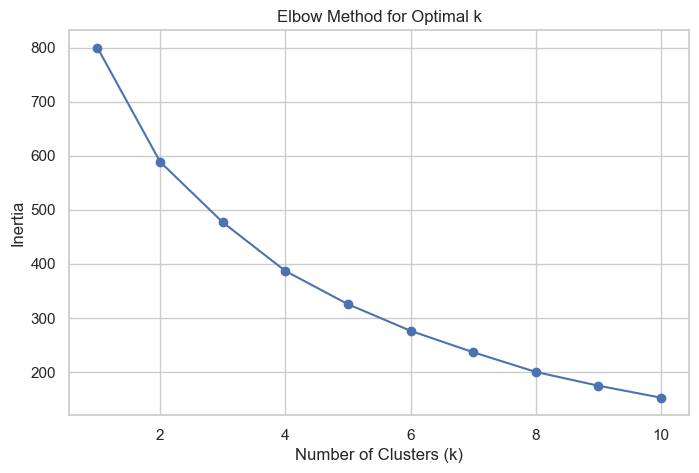

In [13]:
#Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
#Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

#Add cluster labels to the original scaled DataFrame
scaled_df['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("Clustered Data Preview:")
display(scaled_df.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered Data Preview:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,1
1,1.128152,-1.281035,-1.738999,1.195704,1
2,-0.886405,-1.352802,-1.700830,-1.715913,2
3,-0.886405,-1.137502,-1.700830,1.040418,0
4,-0.886405,-0.563369,-1.662660,-0.395980,2


In [16]:
#minimizes variance
linked = linkage(scaled_df.drop(columns='Cluster'), method='ward')

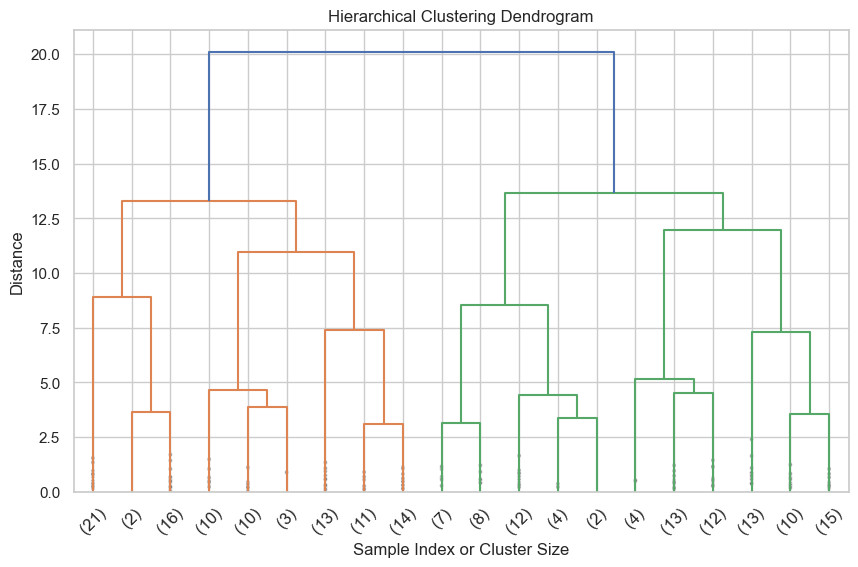

In [17]:
#Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [18]:
#Assign cluster labels
hierarchical_labels = fcluster(linked, t=5, criterion='maxclust')

#Add to scaled DataFrame
scaled_df['Hierarchical_Cluster'] = hierarchical_labels

#updated DataFrame
print("Hierarchical Clustering Results:")
display(scaled_df.head())


Hierarchical Clustering Results:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Hierarchical_Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,1,2
1,1.128152,-1.281035,-1.738999,1.195704,1,2
2,-0.886405,-1.352802,-1.700830,-1.715913,2,5
3,-0.886405,-1.137502,-1.700830,1.040418,0,2
4,-0.886405,-0.563369,-1.662660,-0.395980,2,5


In [19]:
#Import PCA
from sklearn.decomposition import PCA

In [20]:
#Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df.drop(columns=['Cluster', 'Hierarchical_Cluster']))


In [21]:
#Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Add cluster labels from K-Means and Hierarchical
pca_df['KMeans_Cluster'] = scaled_df['Cluster']
pca_df['Hierarchical_Cluster'] = scaled_df['Hierarchical_Cluster']

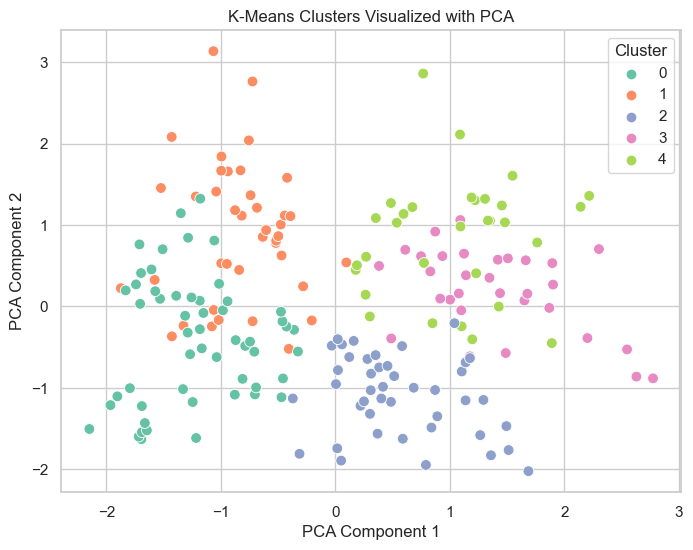

In [22]:
#Plot PCA-reduced data with K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set2', s=60)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


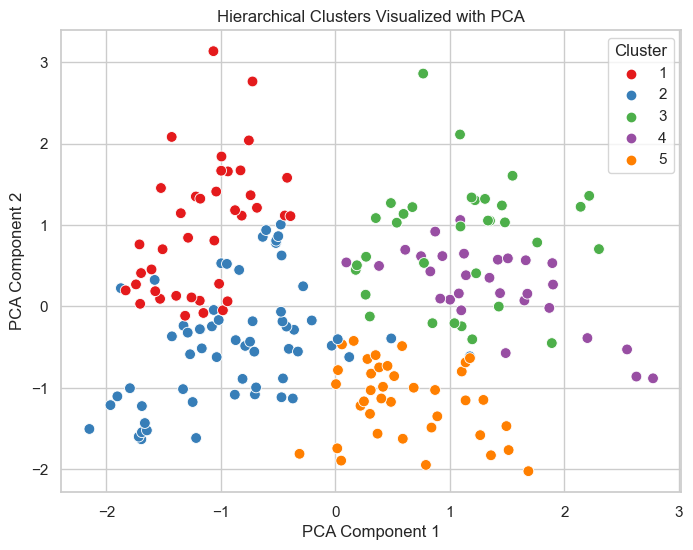

In [23]:
#Plot PCA-reduced data with Hierarchical clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set1', s=60)
plt.title('Hierarchical Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
